# SC1015 Mini-Project

Group: 2, FCEE

Lee Heng Sheng Brandon, U2322900C \
Alan Lee Leman, U2321753B \
Wee Zi Hao, U2323380H

### Final Attribute Information

> 1. `age`: age in years (Numerical)
2. `sex`: 0 = female; 1 = male (Categorical)
3. `cp` changed to `chest_pain`: Chest pain type (4 values) (Categorical)
4. `trestbps` changed to `blood_pressure`: Resting blood pressure (in mm Hg on admission to the hospital) (Numerical)
5. `chol` changed to `cholesterol`: Serum cholesterol in mg/dl (serum cholestoral in mg/dl) (Numerical)
6. `fbs` changed to `fasting_blood_sugar`: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) (Categorical)
7. `restecg` changed to `resting_ecg_result`: Resting electrocardiographic results (values 0,1,2) (Categorical)
8. `thalach` changed to `max_heart_rate`: Maximum heart rate achieved (in bpm) (Numerical)
9. `exang` changed to `exercise_induced_angina`: Exercise induced angina (0 = no; 1 = yes) (Categorical)
10. `oldpeak` changed to `st_depression`: ST depression induced by exercise relative to rest (Numerical)
11. `new_st_depression`: The presence of ST depression induced by exercise relative to rest (0 = no; 1 = yes) (Categorical)
12. `slope`: The slope of the peak exercise ST segment (0, 1, 2) (Categorical)
13. `ca` changed to `num_affected_vessels`: Number of major vessels (0-3) colored by fluoroscopy (Categorical)
14. `thal` changed to `defect_type`: 1 = normal; 2 = fixed defect; 3 = reversable defect (Categorical)
15. `target` changed to `heart_disease`: 0 = no heart disease; 1 = heart disease (Categorical)

### Essential Libraries

Let us begin by importing the essential Python Libraries for Data Extraction and Cleaning.

> NumPy : Library for Numeric Computations in Python \
Pandas : Library for Data Acquisition and Preparation \
Matplotlib : Low-level library for Data Visualization \
Seaborn : Higher-level library for Data Visualization 

In [97]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot

### Import the Dataset

We will be importing our clean_data.csv dataset that we previously saved.\
Dataset is a cleaned version of [Heart Disease](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset). By David Lapp. 


In [98]:
# Importing our dataset
clean_data = pd.read_csv("datasets\clean_data.csv")

print("Data dimensions:", clean_data.shape)

clean_data

Data dimensions: (1000, 15)


,age,sex,chest_pain,blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg_result,max_heart_rate,exercise_induced_angina,st_depression,new_st_depression,slope,num_affected_vessels,defect_type,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,1,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,1,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,59,1,1,140,221,0,1,164,1,0.0,0,2,0,2,1
996,60,1,0,125,258,0,0,141,1,2.8,1,1,1,3,0
997,47,1,0,110,275,0,0,118,1,1.0,1,1,1,2,0
998,50,0,0,110,254,0,0,159,0,0.0,0,2,0,2,1


### Splitting our dataset

Before we analyse our data, we split our dataset into train and test sets. We do this before analysis so that we have no knowledge of our test set to work with. This allows us to use our test set to measure how well our models performed, and whether they support our initial hypotheses derived from our exploratory data analysis.

We chose a 80:20 train-test split as a starting point. As our dataset is relatively small (n < 1000), each observation is valuable data. However, we cannot make our test set too small, or we would not have an appropriate validation set to test our models on.

For consistency, random_state will be set to 42.

In [99]:
# Importing the train_test_split function
from sklearn.model_selection import train_test_split

# Split the data into predictors and response
X = clean_data.drop(["heart_disease"], axis = 1)
y = clean_data["heart_disease"]

# random_state 42 for consistency
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Combine our train sets
train_data = pd.concat([X_train, y_train], axis = 1).reset_index(drop = True)

train_data

,age,sex,chest_pain,blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg_result,max_heart_rate,exercise_induced_angina,st_depression,new_st_depression,slope,num_affected_vessels,defect_type,heart_disease
0,44,1,0,120,169,0,1,144,1,2.8,1,0,0,1,0
1,54,1,0,122,286,0,0,116,1,3.2,1,1,2,2,0
2,66,0,3,150,226,0,1,114,0,2.6,1,0,0,2,1
3,44,1,0,112,290,0,0,153,0,0.0,0,2,1,2,0
4,68,0,2,120,211,0,0,115,0,1.5,1,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,54,1,0,110,206,0,0,108,1,0.0,0,1,1,2,0
796,57,1,0,132,207,0,1,168,1,0.0,0,2,0,3,1
797,57,1,0,130,131,0,1,115,1,1.2,1,1,1,3,0
798,52,1,0,112,230,0,1,160,0,0.0,0,2,1,2,0


In [100]:
# Make a list of numerical and categorical variables
cat_var = ["sex", "chest_pain", "fasting_blood_sugar", "resting_ecg_result", "exercise_induced_angina", "new_st_depression", 
           "slope", "num_affected_vessels", "defect_type", "heart_disease"]
num_var = [var for var in clean_data.columns if var not in cat_var]

### Statistical Summary of Numerical Variables

Let us take a look at the statistical summary of our numerical variables.

In [101]:
# Statistical summary of numerical data

train_data[num_var].describe().round(2)

,age,blood_pressure,cholesterol,max_heart_rate,st_depression
count,800.00,800.00,800.00,800.00,800.00
mean,54.59,131.44,245.97,148.71,1.11
std,8.99,17.50,51.84,22.78,1.18
min,29.00,94.00,126.00,71.00,0.00
25%,48.00,120.00,210.75,132.00,0.00
50%,56.00,130.00,240.00,152.00,0.80
75%,61.00,140.00,275.00,165.00,1.80
max,77.00,200.00,564.00,202.00,6.20


### Statistical Summary Observations (Numerical Variables)

Based on the statistical summary, we can observe that the standard deviations of `blood_pressure` (17.50), `cholesterol` (51.84), `max_heart_rate` (22.78) and even `st_depression` (1.18) appear quite high, indicating great variance among patients in these categories. This could mean that these factors could be useful distinguishing factors to determine the presence of `heart_disease`. 

We can try to measure how high the standard deviations are by comparing them as a proportion of the standard deviation to the mean $\frac{\sigma}{\bar{x}}$.

In [102]:
for var in num_var:
    print(f"{var}: {train_data[var].std() / train_data[var].mean()}")

age: 0.16478118625164845
blood_pressure: 0.1331292870535101
cholesterol: 0.21077333306655546
max_heart_rate: 0.15317583587256833
st_depression: 1.0662198748389078


We can see that the standard deviation of `st_depression` is almost the same as its mean. 

We shall explore more further on. We can also see that the median `age` (56.00) and mean `age` (54.5) are relatively old. Similarly, the median `blood_pressure` (130.00) and mean `blood_pressure` (131.44) are considered elevated (a normal blood pressure reading is <120). `st_depression` also has a median of 0.80 and a mean of 1.11. This is typically considered high, as a normal `st_depression` is 0 for a healthy patient without abnormalities. These factors could be something to keep in mind later on, especially as we formulate our hypotheses. 

### Statistical Summary of Categorical Variables

Let us take a look at the statistical summary of our categorical variables.

In [103]:
# Statistical summary of categorical data

train_data[cat_var].astype("category").describe()

,sex,chest_pain,fasting_blood_sugar,resting_ecg_result,exercise_induced_angina,new_st_depression,slope,num_affected_vessels,defect_type,heart_disease
count,800,800,800,800,800,800,800,800,800,800
unique,2,4,2,3,2,2,3,4,3,2
top,1,0,0,1,0,1,1,0,2,0
freq,551,397,681,397,519,548,380,458,422,400


### Statistical Summary Observations (Categorical Variables) 

> 1. `count` - number of data
2. `unique` - number of unique classes
3. `top` - most frequent class
4. `freq` - frequency of that class

Based on the statistical summary, we can observe that:

1. Most patients (682) in our train dataset do not have a high fasting blood sugar level (>120 mg/dl indicates the presence of prediabetes/diabetes). 
2. Most patients (519) do not have exercise induced angina.
3. Most patients (458) do not have major vessels coloured by fluoroscopy.
4. Most patients (422) have a fixed defect (`defect_type` = 2).

We can thus conclude that most patients do not suffer from many of the categorical variables, apart from `slope` (top = 1) and `defect_type` (top = 2). This could possibly indicate that `slope` and `defect_type` are more useful predictors for predicting `heart_disease` later on. We shall further explore this in the following cells.

### Further Visualisations (Numerical Variables)

### Visualisation with Stripplot

To further explore how each numerical variable might affect our `heart_disease`, we shall plot the stripplots of our numerical variables against our response variable, `heart_disease`. We use a stripplot instead of a swamplot due to size constraints.

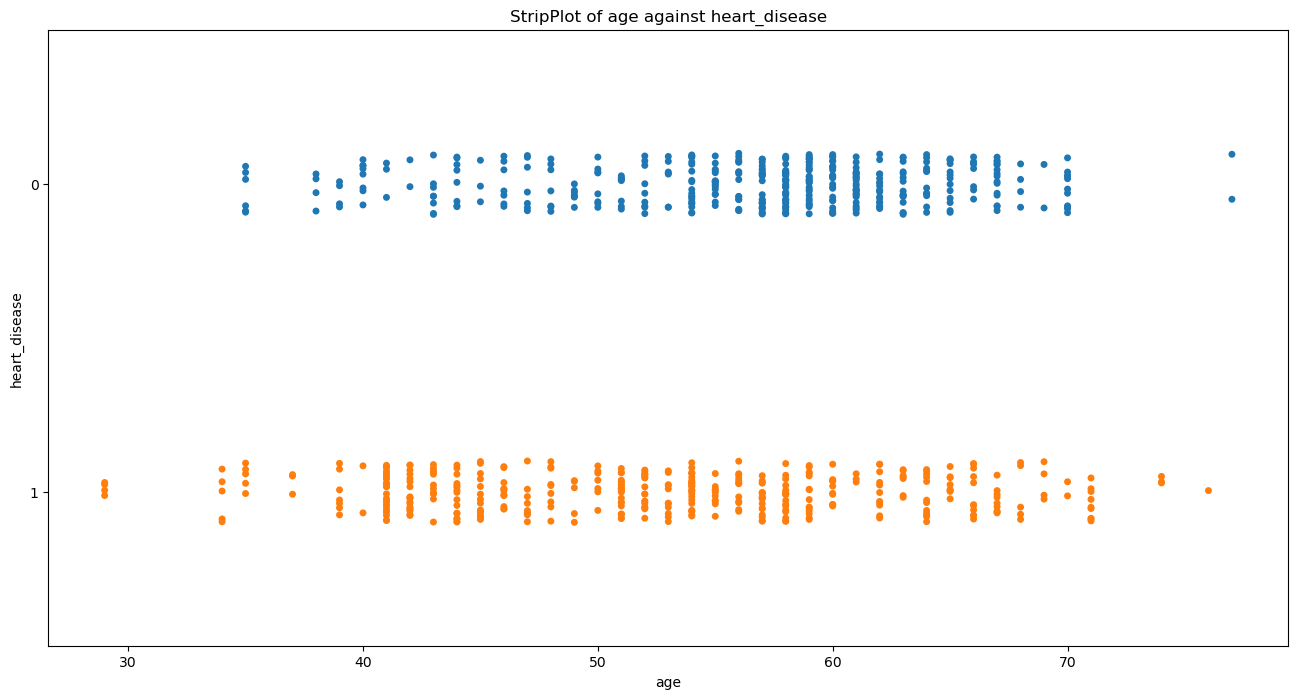

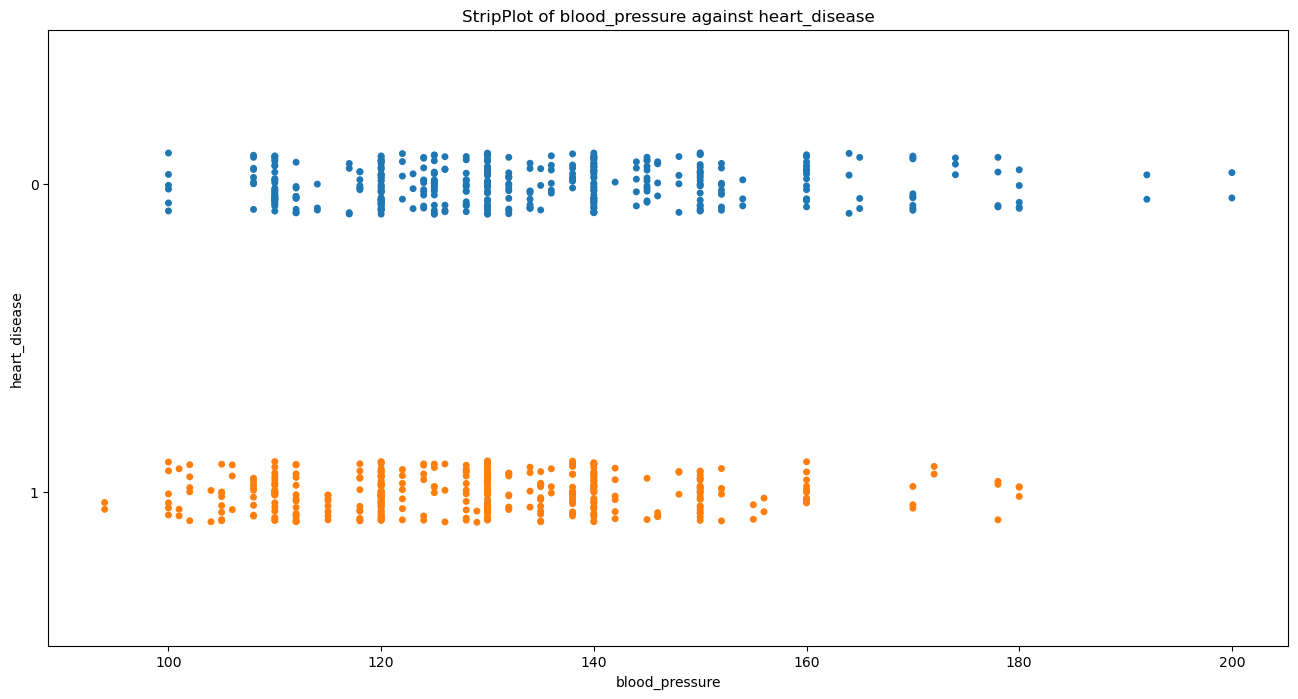

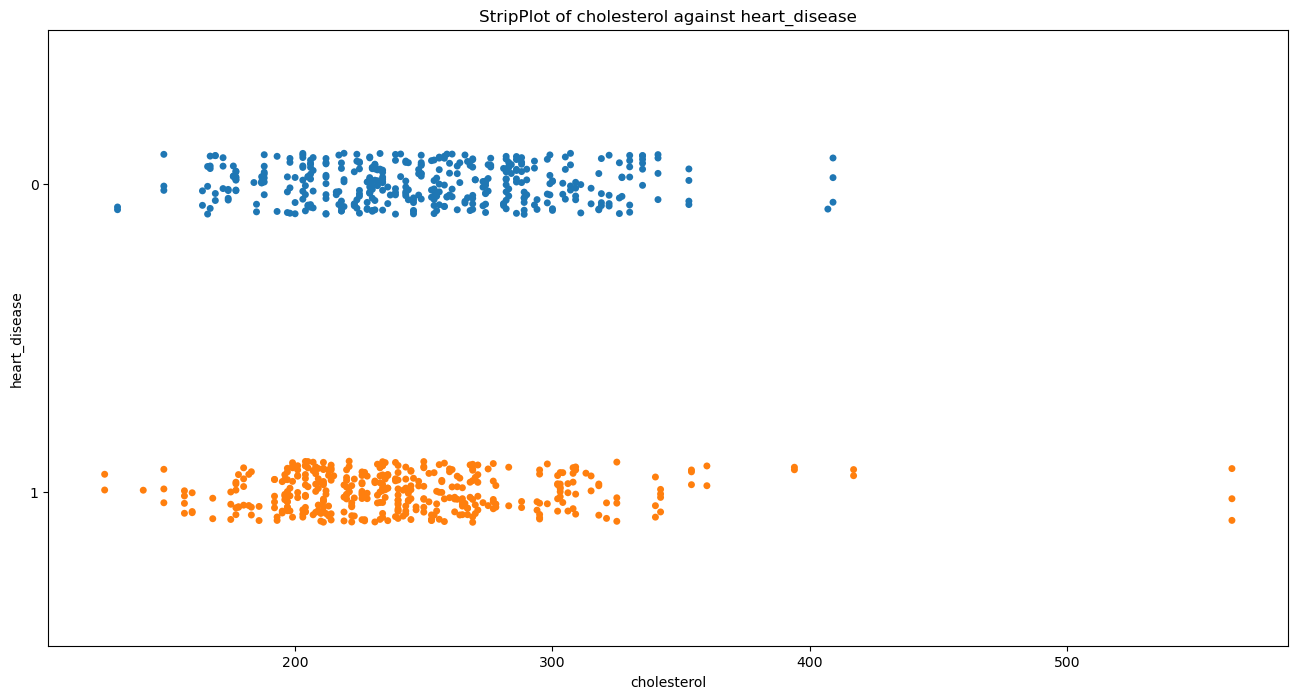

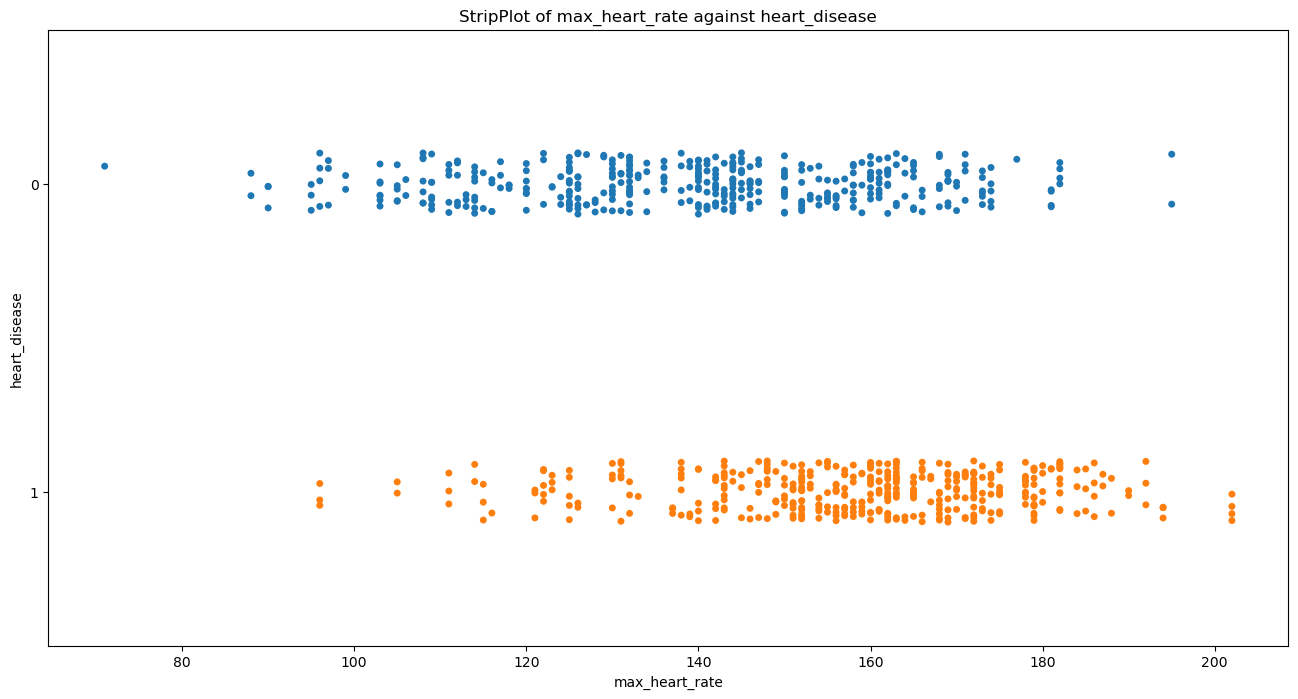

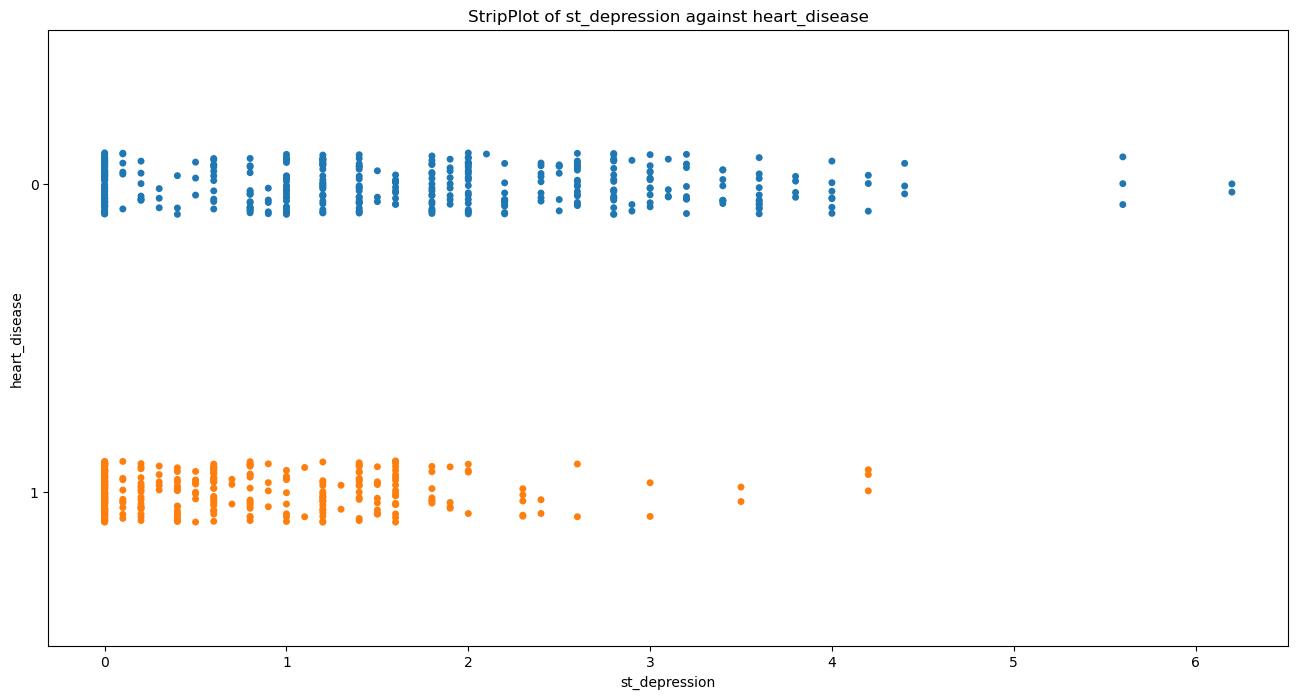

In [104]:
for var in num_var:
    f = plt.figure(figsize = (16, 8))
    
    # Create a strip plot for the current numerical variable
    sb.stripplot(x = train_data[var], y = train_data["heart_disease"].astype("category"))
    plt.xlabel(var)
    plt.ylabel("heart_disease")
    plt.title(f"StripPlot of {var} against heart_disease")  # Set the title
    plt.show() 

### Stripplot Observations

Based on the stripplots above, we can observe that most plots for both `heart_disease` and no `heart_disease` appear similar. 

However, there are a few key observations to be made. We can see that the plot for `max_heart_rate` for heart disease = 0 appears more centered to the left, with the plot for heart disease = 1 more centered to the right. We can also see that the plots of `st_depression` for no heart disease appears to have more data scattered on the right.

Analysing the plots, we can deduce that those who have a `max_heart_rate` of >\~180 are more likely to have `heart_disease`. Similarly, we can deduce that people who have `st_depression` >\~4.5 are less likely to not have `heart_disease`. `st_depression` and `max_heart_rate` may be useful variables for predicting `heart_disease` later on.

### Visualisation with Boxplots

It could be better to visualise numerical data using boxplots. This gives us a better idea of the differences between the median, quantiles and variance of the two classes.

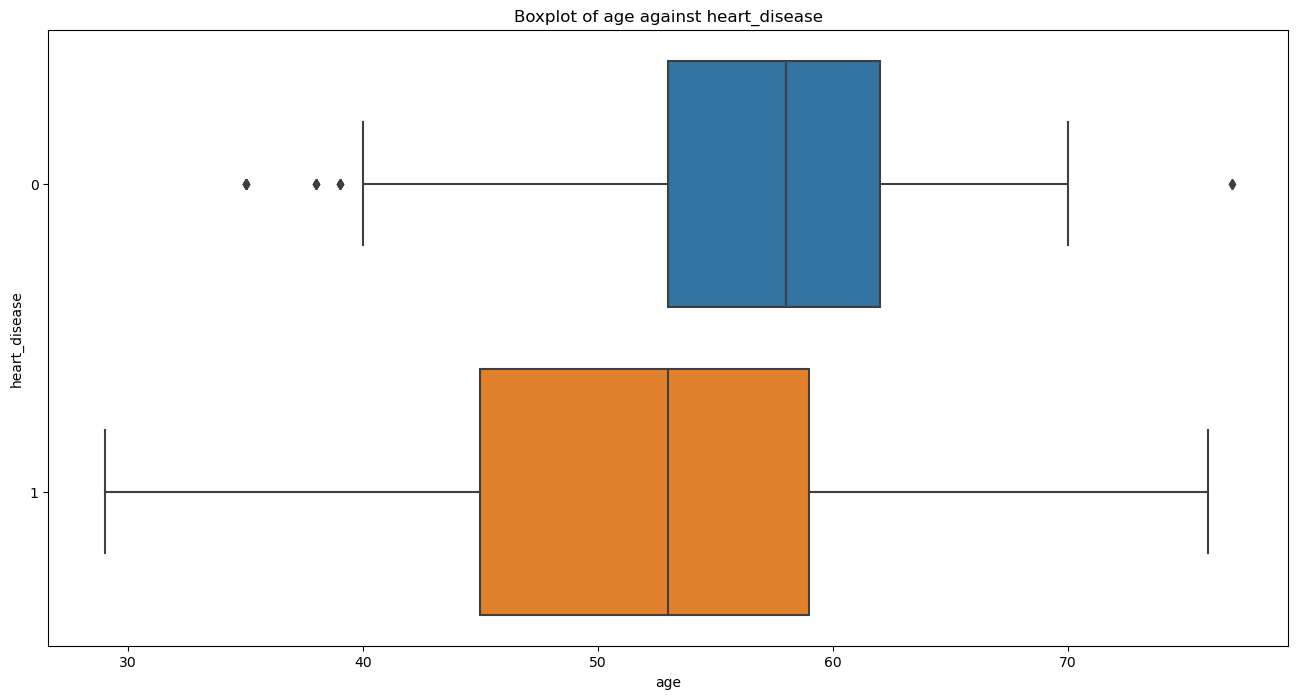

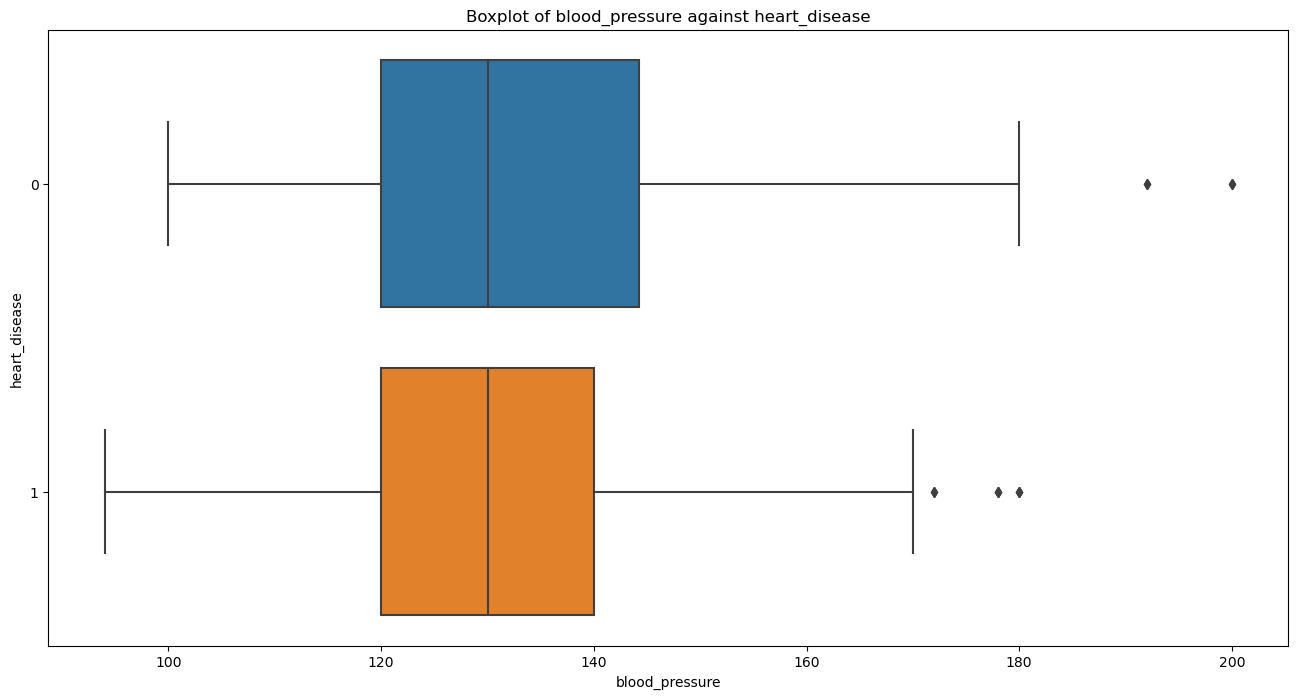

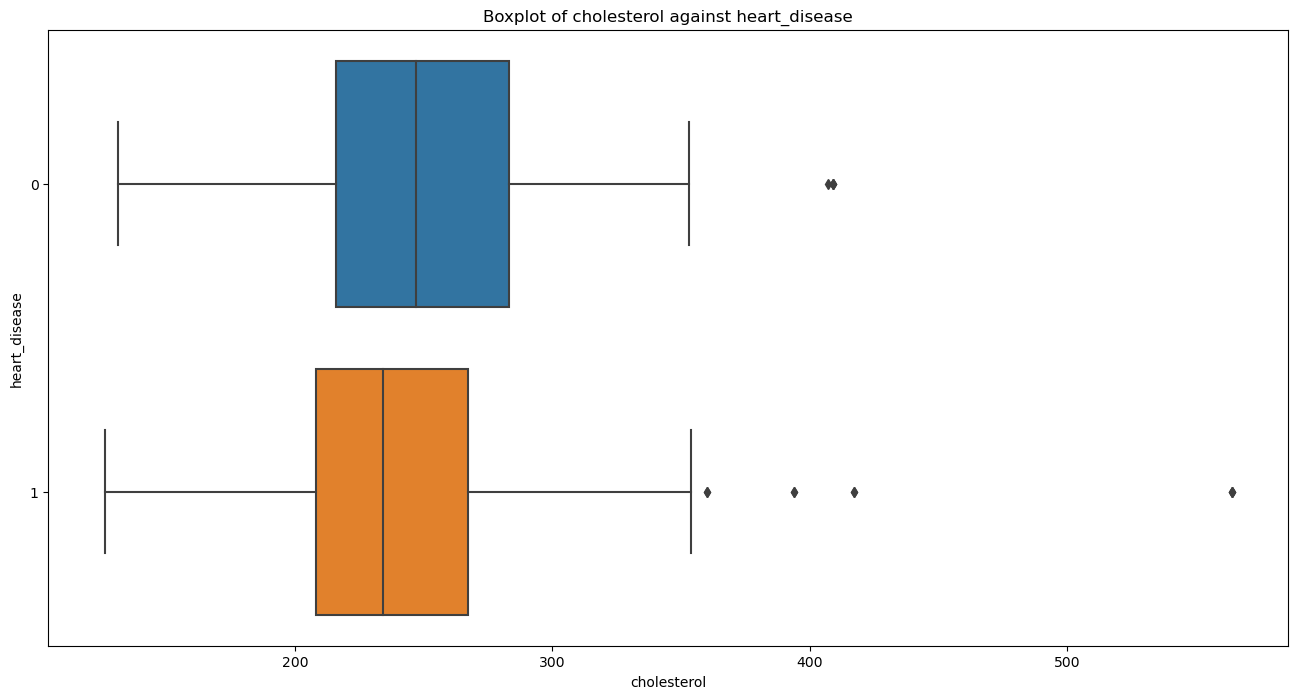

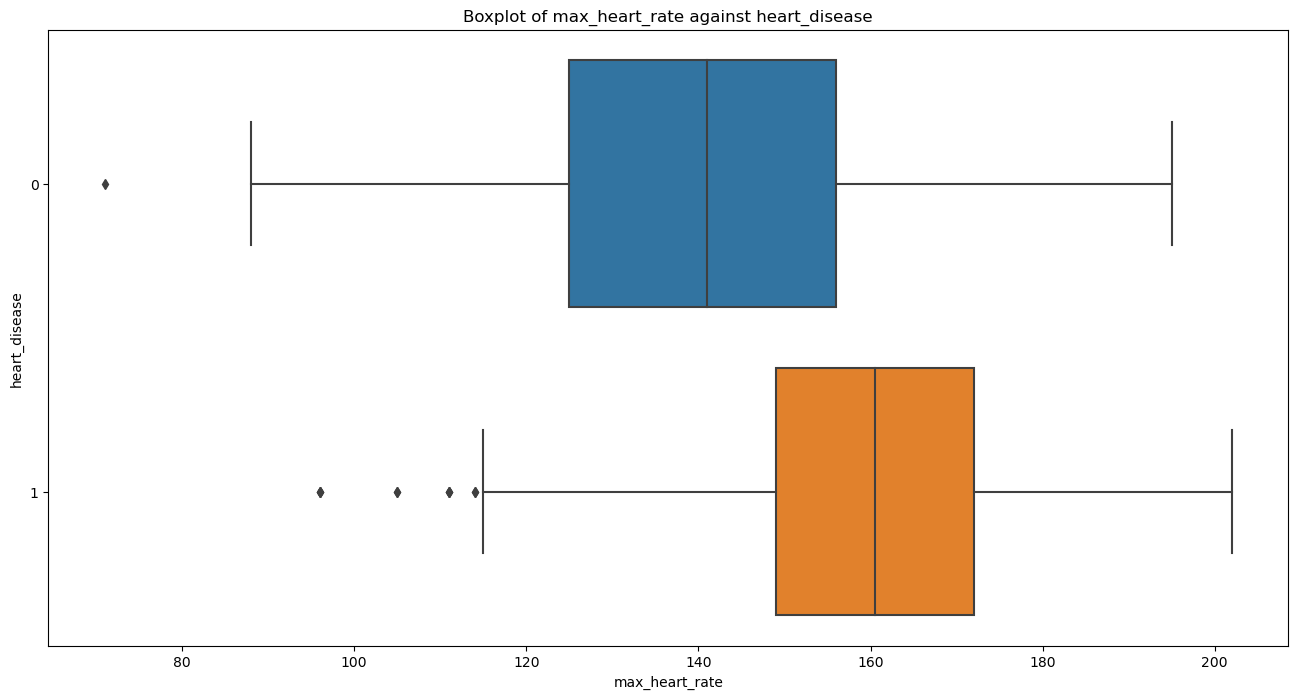

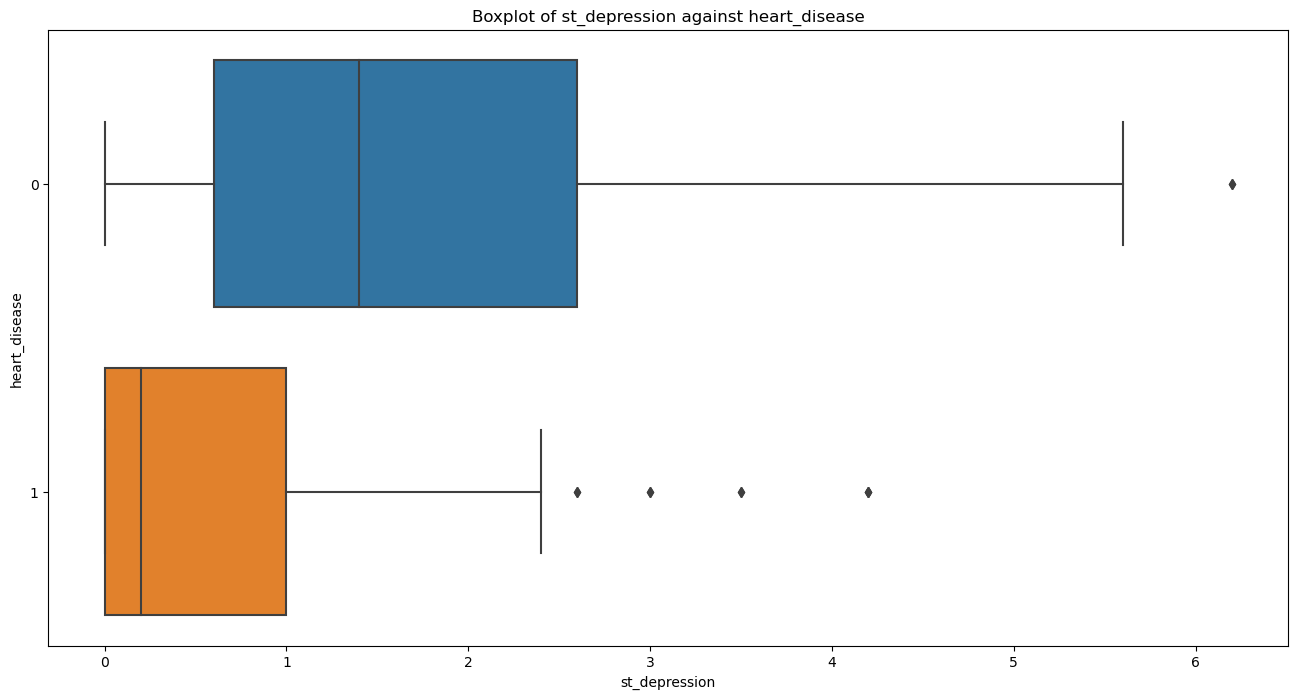

In [105]:
for var in num_var:
    f = plt.figure(figsize = (16, 8))
    
    # Create a strip plot for the current numerical variable
    sb.boxplot(x = train_data[var], y = train_data["heart_disease"].astype("category"))
    plt.xlabel(var)
    plt.ylabel("heart_disease")
    plt.title(f"Boxplot of {var} against heart_disease")  # Set the title
    plt.show() 

### Boxplot Observations

Now we have a better idea of the difference in distribution of data. You may observe that many of the blue boxplots (heart disease = 0) appear more distributed to the right. For example, patients with a higher age may not necessarily mean they have a higher probability of having `heart_disease`. This goes against our assumed domain knowledge, and should be a consideration when we formulate our hypotheses.

### Further Visualisations (Categorical Variables)

### Visualisation with Heatmap

To further explore how each categorical variable might affect our `heart_disease`, we shall plot a heatmap between each individual categorical variable and `heart_disease`.

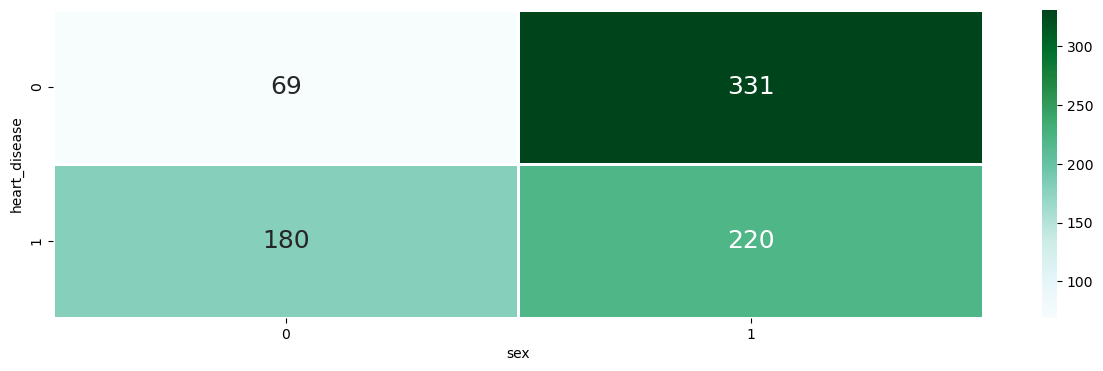

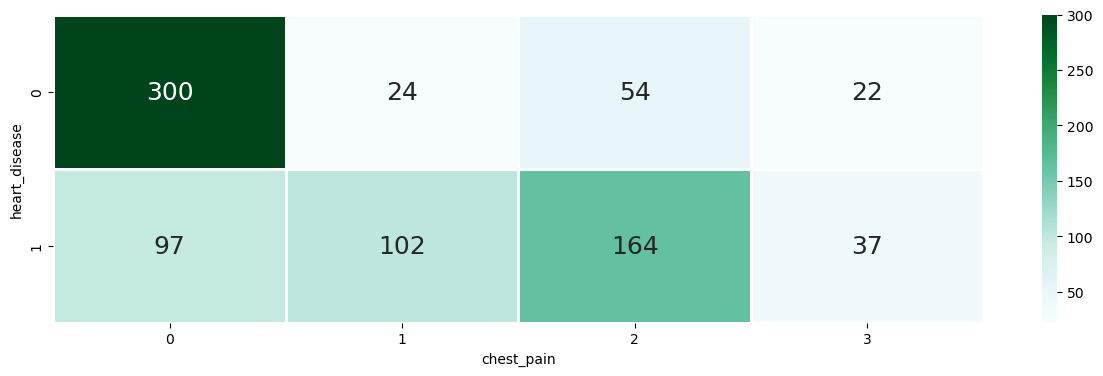

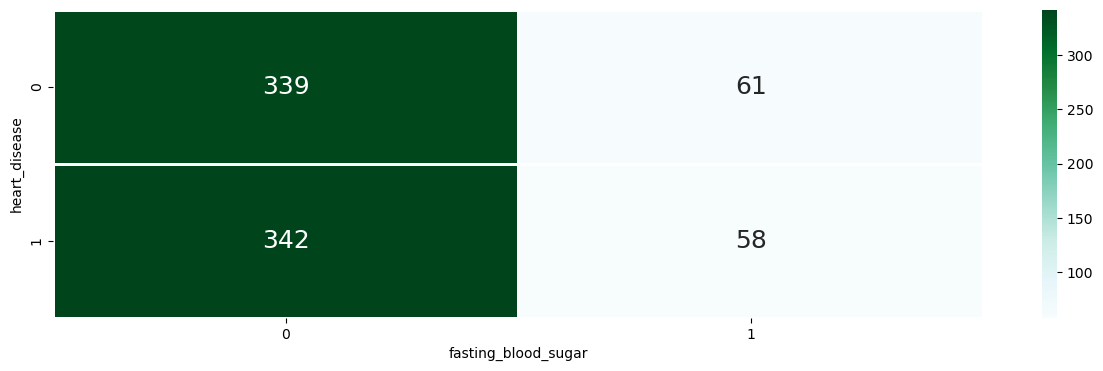

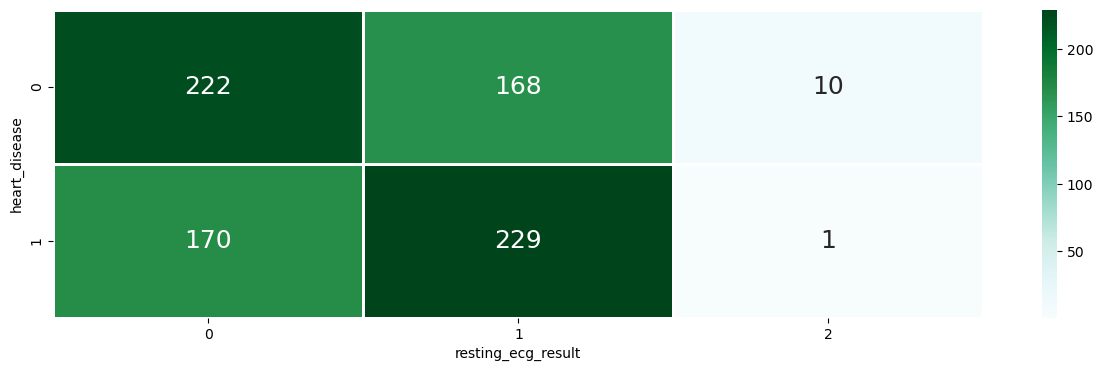

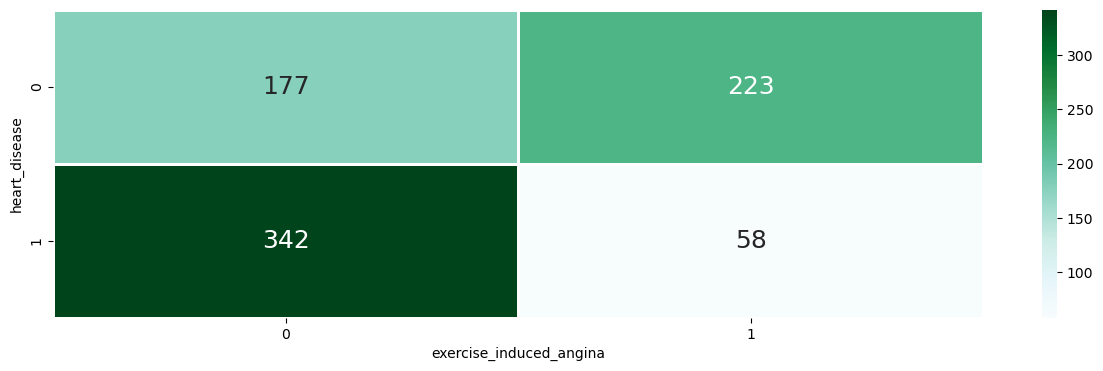

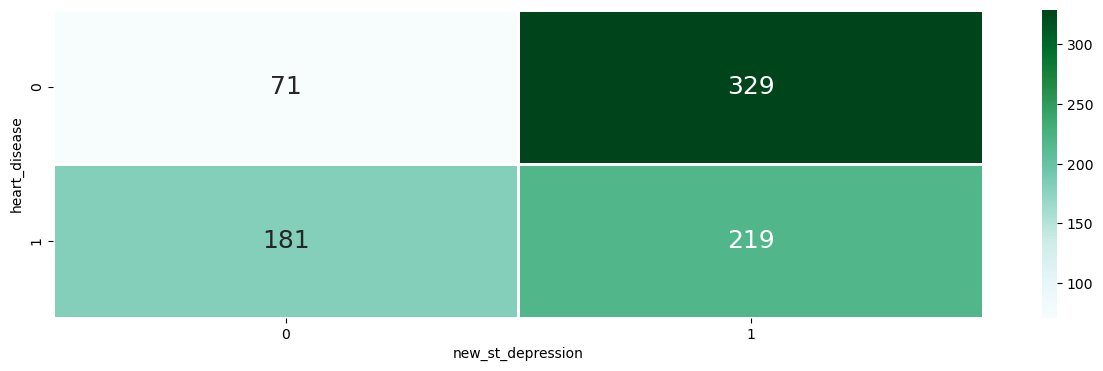

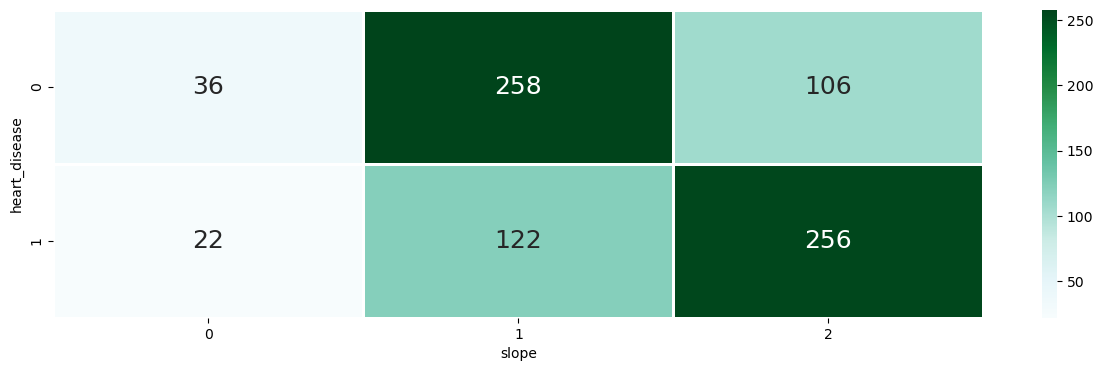

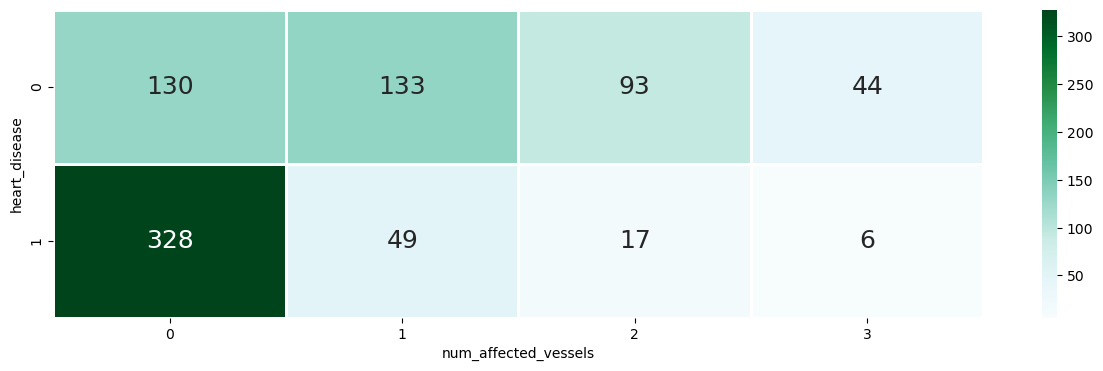

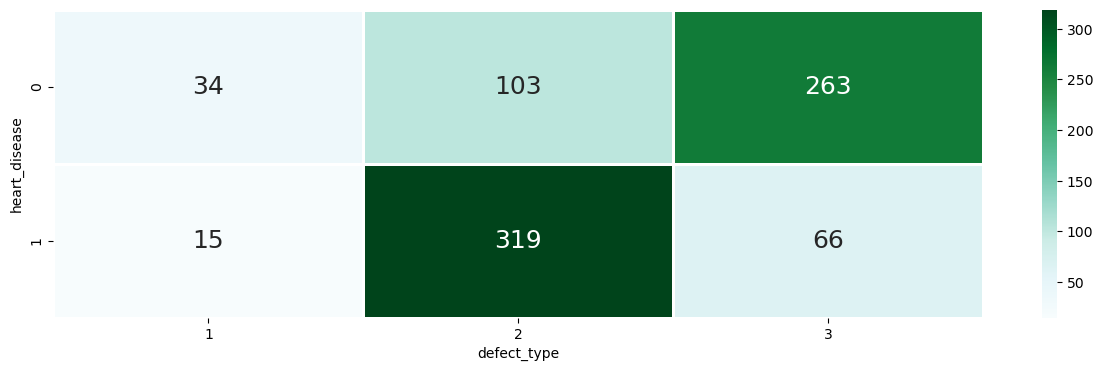

In [106]:
# Exclude plotting heart_disease against itself
for var in cat_var[:-1]:
    f = plt.figure(figsize=(15, 4))
    
    # Create a heatmap for the current categorical variable
    sb.heatmap(train_data.groupby(['heart_disease', var]).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

### Heatmap Observations

We will be using a Greenscheme for our heatmap. The darker the shade of green, the more datapoints there are in that category. When analysing each heatmap, we want to compare the disparity between each occurance of every variable and the classes `heart_disease` = 0/1. A huge disparity in any occurance of a variable might indicate that the variable could be a useful predictor in predicting `heart_disease`. Based on our observations of the above heatmaps, a few key points stand out: 

1. Patients with any form of `chest_pain` were much more likely to have `heart_disease`.
2. Patients with a `slope` of value 2 were more likely to have `heart_disease` as compared to the value of 1.
3. More patients with `num_affected_vessels` value of 0 were more likely to have `heart_disease` compared with other values.
4. Patients with a `defect_type` value of 2 were more likely to have `heart_disease`.



### Complex Relationships

We shall explore slightly more complex bi-variate relationships of predictors with `heart_disease`, and see if we can observe something more interesting. We will be using the key variables identified from our further visualisations earlier.

### Complex Relationships (Numerical Variables)

The 2 numerical variables we identified to be key were `max_heart_rate` and `st_depression`. We may observe their relationship in greater detail through a stripplot.

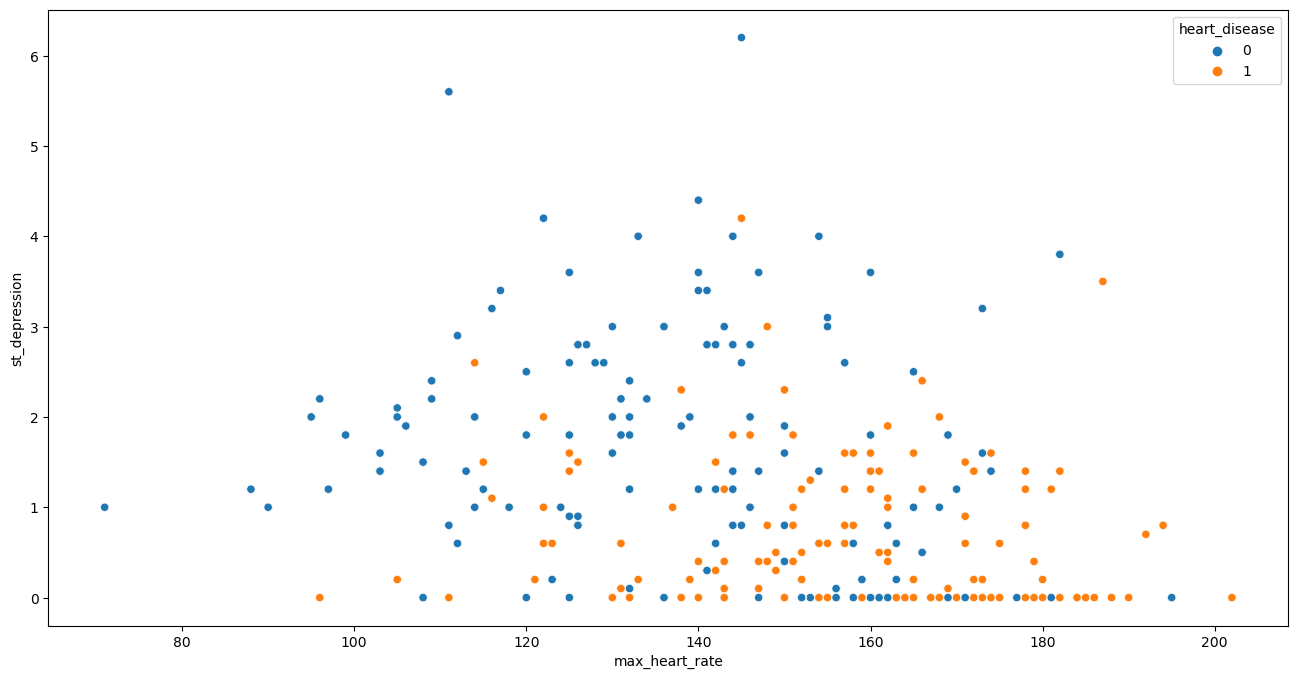

In [107]:
# heart_disease vs max_heart_rate and st_depression

f = plt.figure(figsize=(16, 8))
sb.scatterplot(x = train_data["max_heart_rate"], y = train_data["st_depression"], hue = train_data["heart_disease"]);

### Observations

Based on the scatterplot above, we can see that the majority of the yellow dots representing `heart_disease` lies to the bottom right of the plot. This means that having a high `max_heart_rate` and low `st_depression` could be a useful indicator in determining `heart_disease`. This reaffirms our prior observations as well.

### Complex Relationships (Categorical Variables)

The 4 categorical variables that we identified to be key were `chest_pain`, `slope`, `num_affected_vessels`, `defect_type`. We previously also identified `age` as a possible predictor based on domain knowledge and the statistical summary earlier. We may observe them in greater detail through catplots.

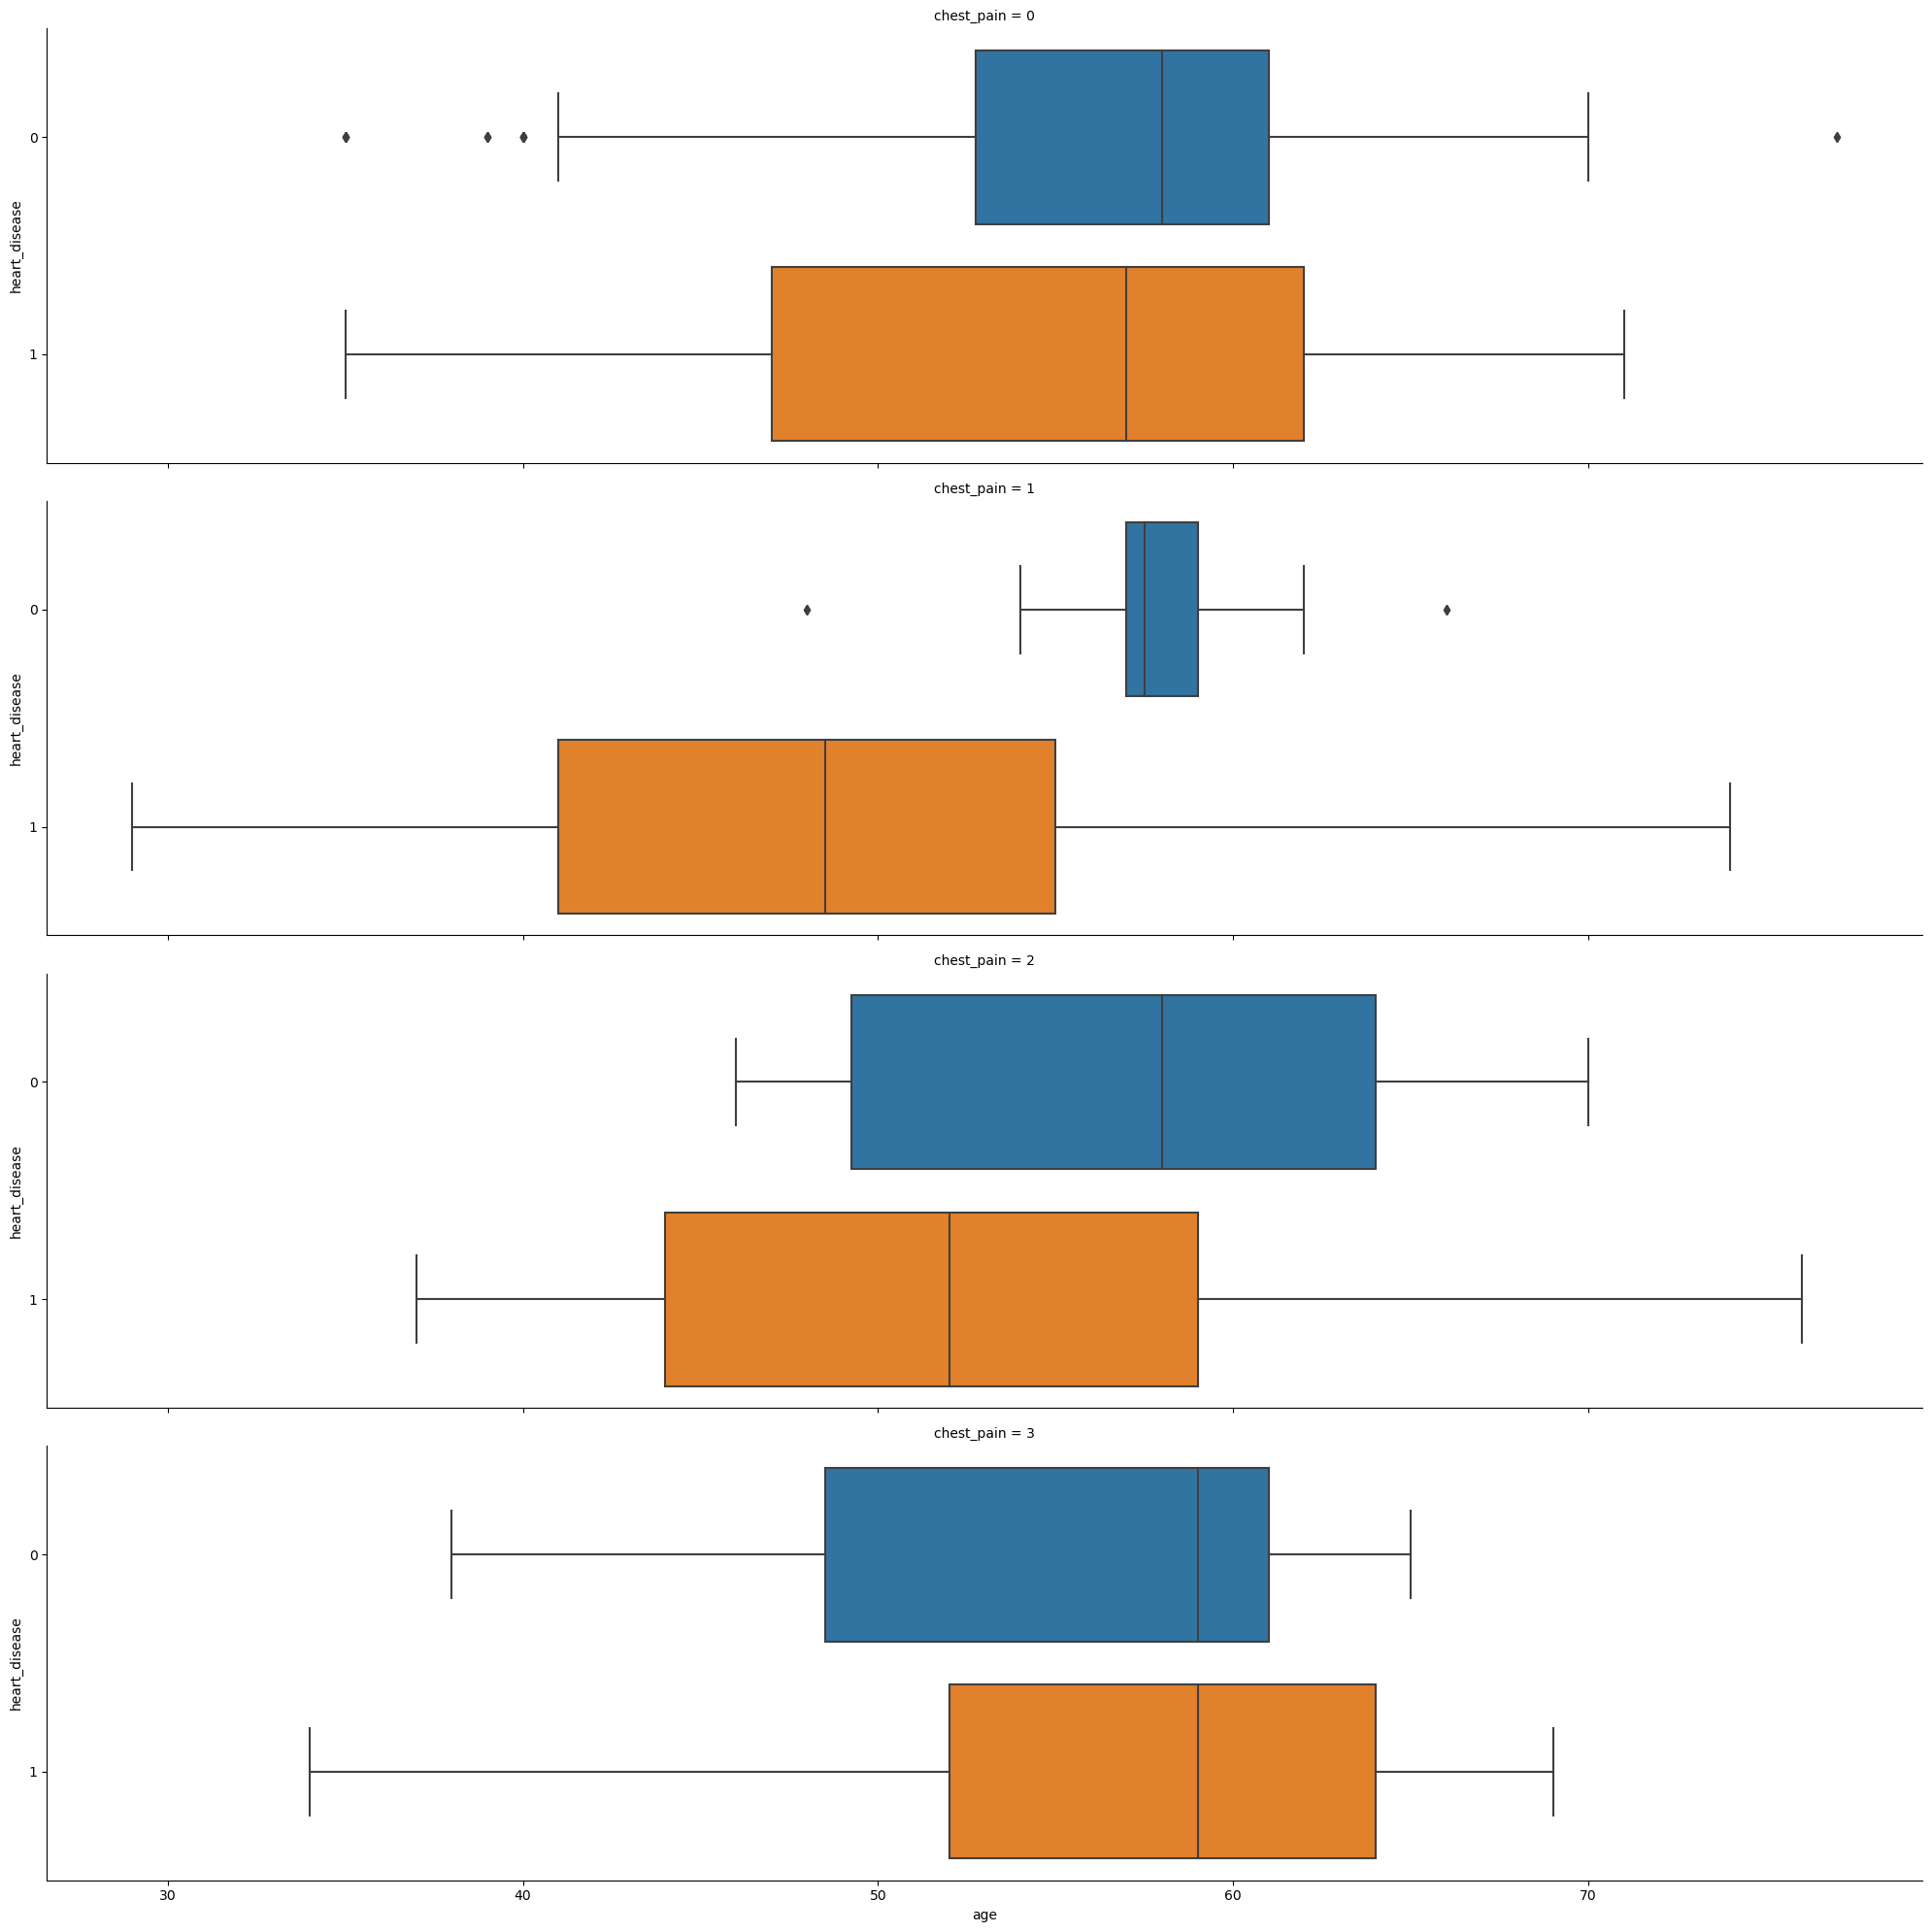

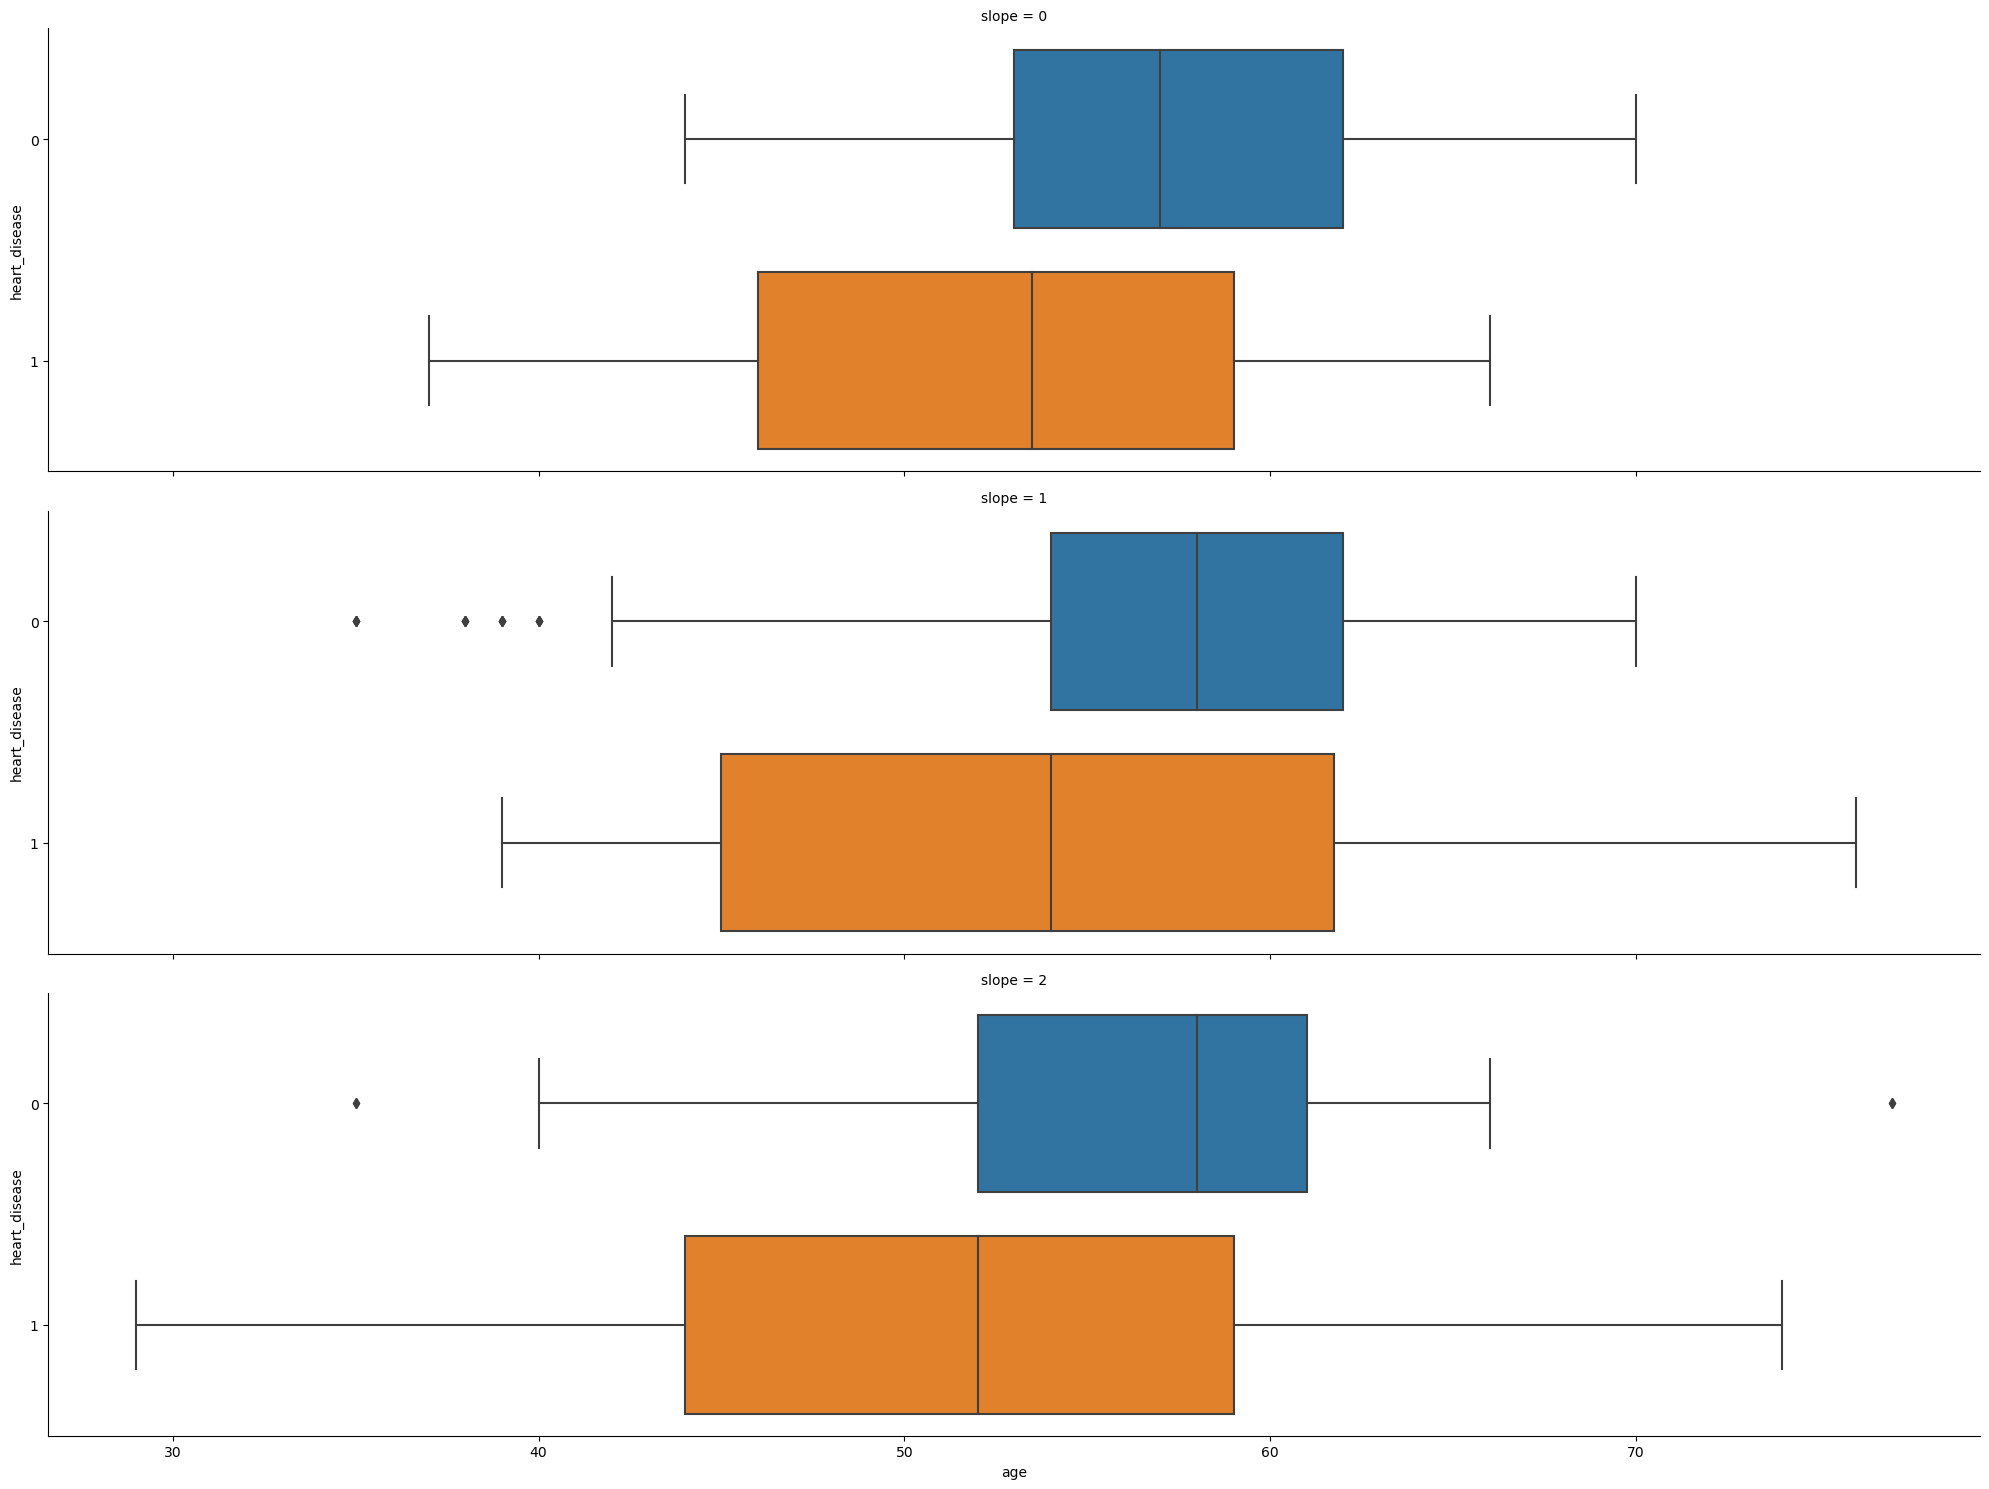

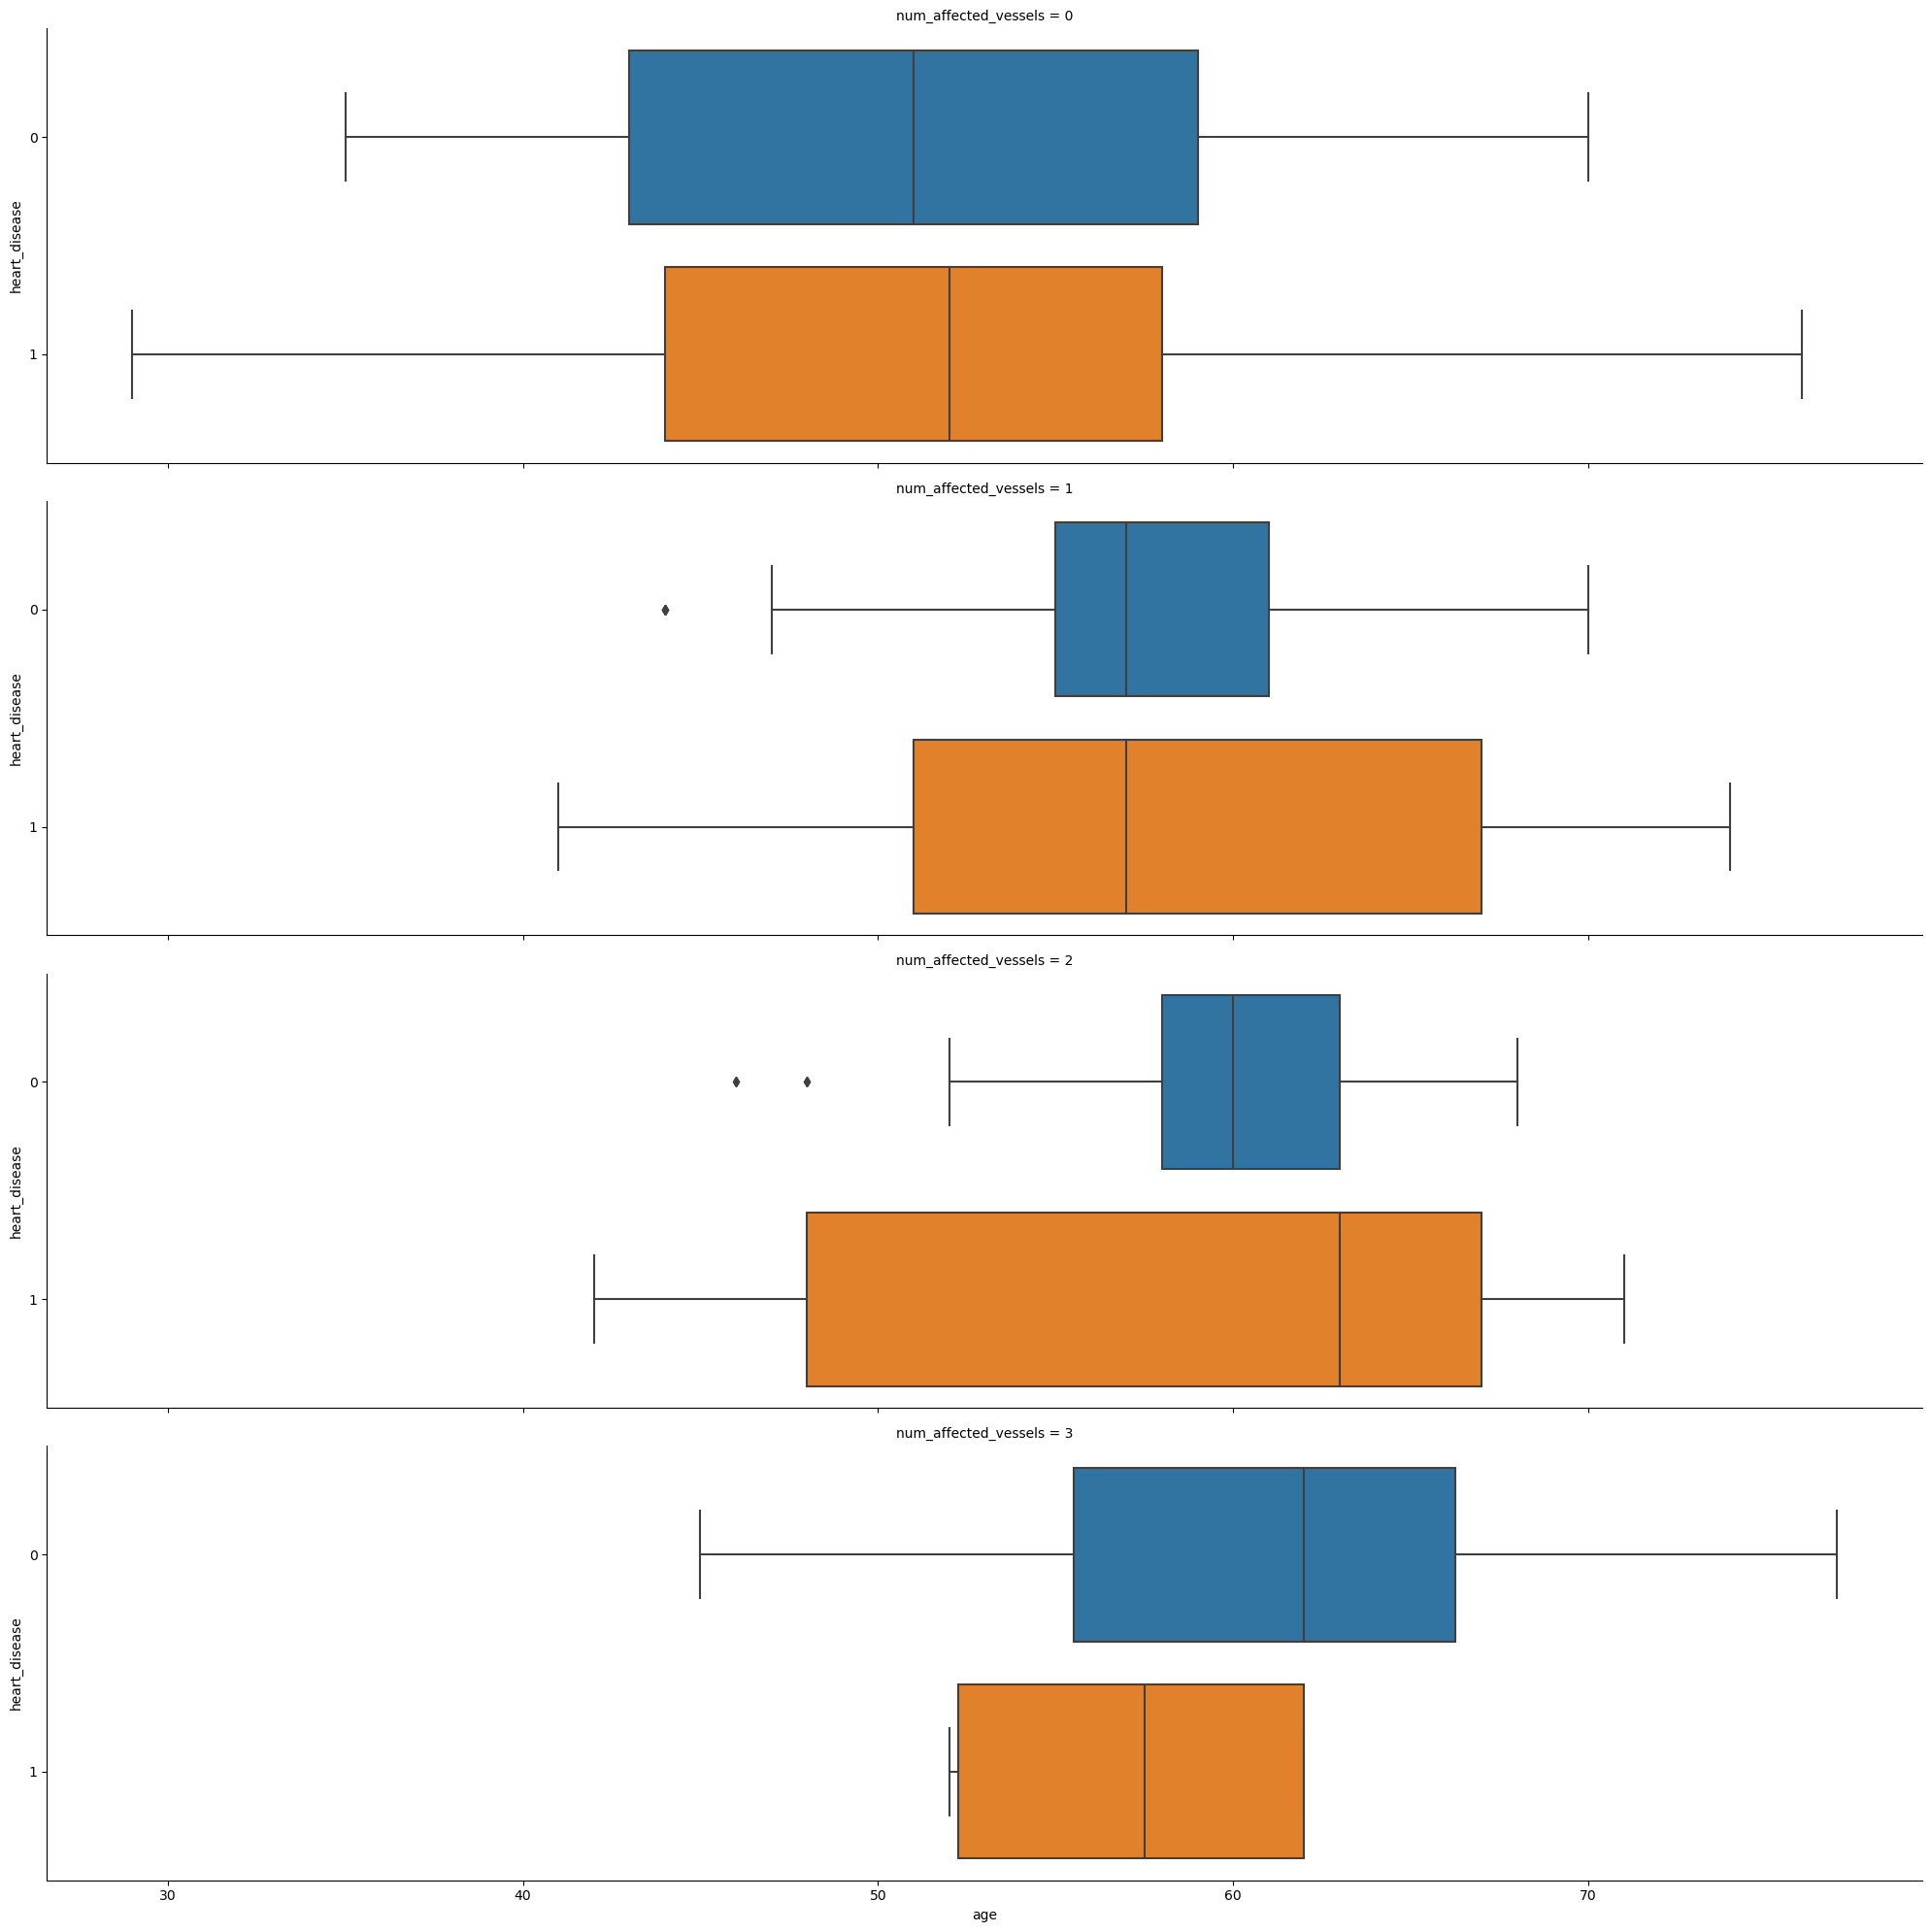

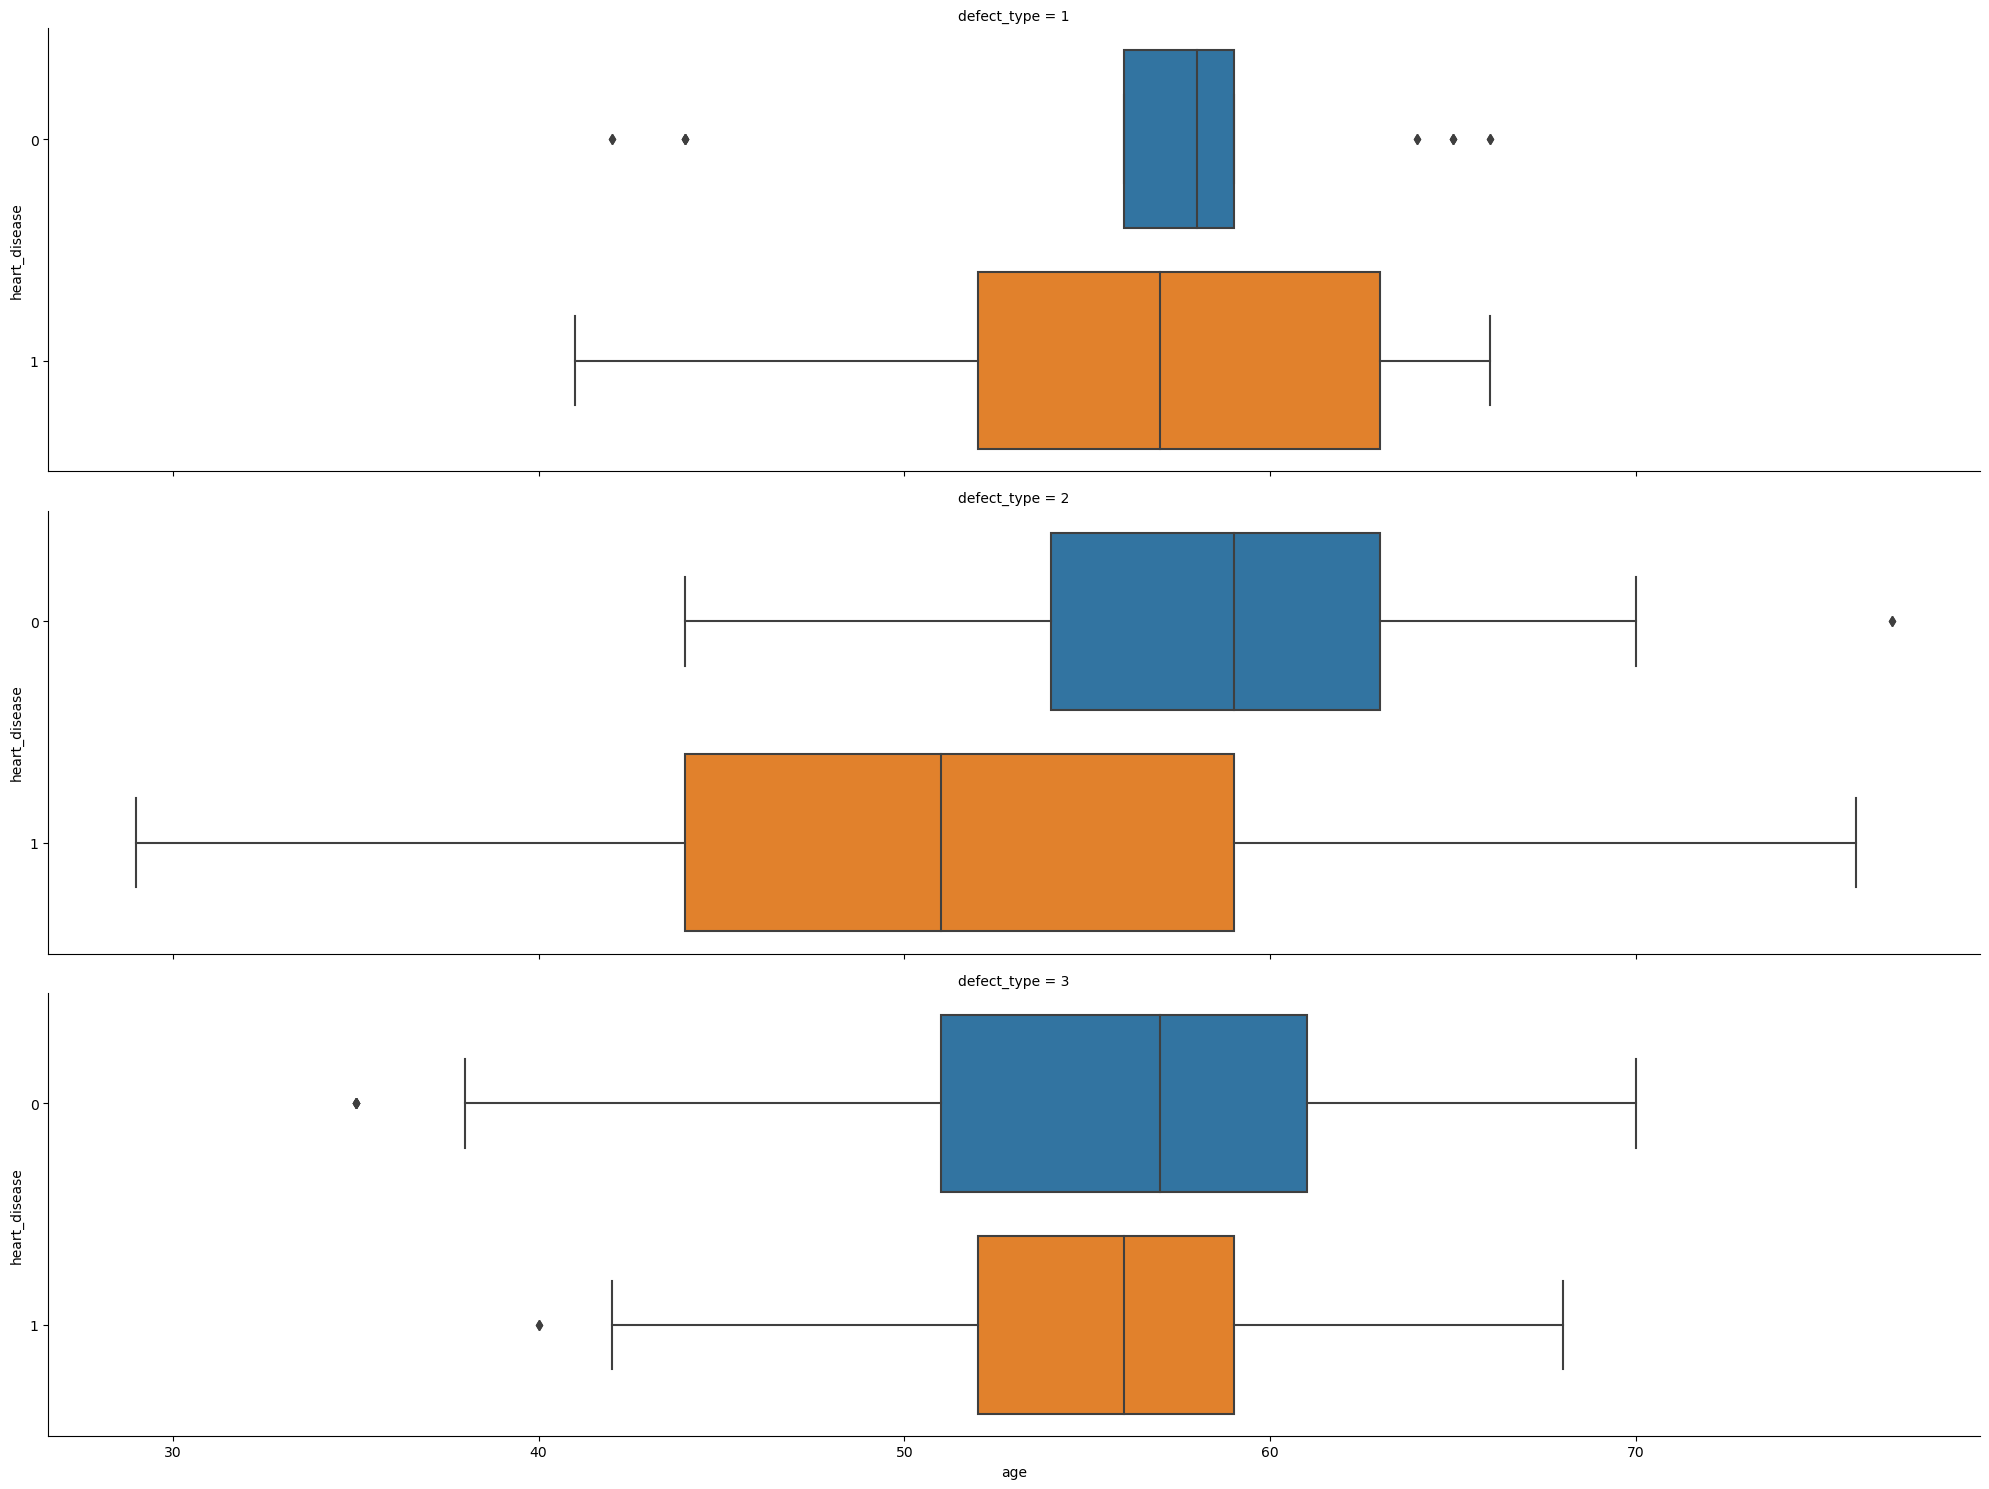

In [108]:
train_data["heart_disease"] = train_data["heart_disease"].astype("category")

sb.catplot(x = "age", y = "heart_disease", row = "chest_pain", data = train_data, kind = "box", aspect = 4)
sb.catplot(x = "age", y = "heart_disease", row = "slope", data = train_data, kind = "box", aspect = 4)
sb.catplot(x = "age", y = "heart_disease", row = "num_affected_vessels", data = train_data, kind = "box", aspect = 4)
sb.catplot(x = "age", y = "heart_disease", row = "defect_type", data = train_data, kind = "box", aspect = 4);

### Observations

Based on our catplots above, we can see that most of the blue boxplots (`heart_disease` = 0) are more distributed to the right as compared to the orange boxplots (`heart_disease` = 1). This means that across all the different categories of features (`chest_pain`, `slope`, `num_affected_vessels`, `defect_type`), there was a generally higher median of age in patients who did not have heart disease.

This means that patients who have a higher `age` do not necessarily have a higher probability of having `heart_disease`. As before, this goes against our assumed domain knowledge. 

### Observations Thus Far

Overall, in our initial statistical summary observations, we determined that `age`, `blood_pressure`, `cholesterol`, `st_depression`, `slope` and `defect_type` could be useful predictors of `heart_disease`.

Through further exploratory data analysis by visualisation, we also concluded that `age`, `st_depression`, `max_heart_rate`, `chest_pain`, `slope`, `num_affected_vessels` aznd `defect_type` could be useful predictors of `heart_disease`. 

Hypothesis 1: `age`, `blood_pressure`, `st_depression`, `slope` and `defect_type` are important factors in predicting heart disease.

Hypothesis 2: `age`, `st_depression`, `max_heart_rate`, `chest_pain`, `slope`, `num_affected_vessels`and `defect_type` are also important factors in predicting heart disease.

As such, we will be testing each of our models with all our hypotheses:

1. With every variable;
2. With `age`, `blood_pressure`, `cholesterol`, `st_depression`, `slope` and `defect_type` from initial summary observations;
3. With `age`, `st_depression`, `max_heart_rate`, `chest_pain`, `slope`, `num_affected_vessels`and `defect_type` from our observations from further analysis.

We will be using these models to determine if the variables we expect to be important useful predictors of `heart_disease` are truly important. In other words, we will be using our models to test our hypotheses. 


## Feature Engineering/Creation

Based on our domain knowledge, we can see that the variables `new_st_depression`, `st_depression`, `exercise_induced_angina` and `slope` are all variables measured during exercise. We could explore creating a new feature through feature engineering to determine if an exercise-related heart problem could be an important factor in predicting heart disease in a patient.

From Yap et al. (2005), "ST depression of 1 mm occurring with adenosine stress, unlike with the ETT, is a significant predictor of ischaemia". A normal st segment during exercise slopes sharply upwards (`slope` = 0) (Hill & Timmis, 2002), and a flat slope (`slope` = 1) would not be a good indicator, and a downward slope (`slope` = 2) an even worse indicator. Exercise-induced angina is a common complaint of cardiac patients (Brown, 1985). 

With the above in mind, we engineer a new variable `exercise_problem`. It will be a categorical variable with values 0/1. `exercise_problem` is 0 when `new_st_depression` is 1, `st_depression` is greater than or equal to 1, `exercise_induced_angina` is 1 and `slope` is 1 or 2. This will variable concludes our final hypothesis: that exercise-related heart problems are an important factor in predicting heart disease.

References:

Yap, L. B., Arshad, W., Jain, A., Kurbaan, A. S., & Garvie, N. W. (2005). Significance of ST depression during exercise treadmill stress and adenosine infusion myocardial perfusion imaging. The international journal of cardiovascular imaging, 21(2-3), 253–260. https://doi.org/10.1007/s10554-004-2458-y

Brown, C. F., & Oldridge, N. B. (1985). Exercise-induced angina in the cold. Medicine and science in sports and exercise, 17(5), 607–612.

In [109]:
def get_exercise_problem(row):
    if row["new_st_depression"] == 1 \
    and row["st_depression"] >= 1 \
    and row["exercise_induced_angina"] == 1 \
    and (row["slope"] == 1 or row["slope"] == 2):
        return 1
    return 0

In [110]:
exercise_problem = pd.DataFrame(clean_data.apply(get_exercise_problem, axis = 1))

# Insert right before target
clean_data.insert(14, "exercise_problem", exercise_problem)

clean_data

,age,sex,chest_pain,blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg_result,max_heart_rate,exercise_induced_angina,st_depression,new_st_depression,slope,num_affected_vessels,defect_type,exercise_problem,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,1,2,2,3,0,0
1,53,1,0,140,203,1,0,155,1,3.1,1,0,0,3,0,0
2,70,1,0,145,174,0,1,125,1,2.6,1,0,0,3,0,0
3,61,1,0,148,203,0,1,161,0,0.0,0,2,1,3,0,0
4,62,0,0,138,294,1,1,106,0,1.9,1,1,3,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,59,1,1,140,221,0,1,164,1,0.0,0,2,0,2,0,1
996,60,1,0,125,258,0,0,141,1,2.8,1,1,1,3,1,0
997,47,1,0,110,275,0,0,118,1,1.0,1,1,1,2,1,0
998,50,0,0,110,254,0,0,159,0,0.0,0,2,0,2,0,1


### Saving our files

We shall save our clean_data into a csv file for future use.

In [111]:
# The code below is commented because we assume that the clean_data.csv file is already saved when you downloaded the project

# clean_data.to_csv("clean_data2.csv", index = False)

### Final Attribute Information

> 1. `age`: age in years (Numerical)
2. `sex`: 0 = female; 1 = male (Categorical)
3. `cp` changed to `chest_pain`: Chest pain type (4 values) (Categorical)
4. `trestbps` changed to `blood_pressure`: Resting blood pressure (in mm Hg on admission to the hospital) (Numerical)
5. `chol` changed to `cholesterol`: Serum cholesterol in mg/dl (serum cholestoral in mg/dl) (Numerical)
6. `fbs` changed to `fasting_blood_sugar`: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) (Categorical)
7. `restecg` changed to `resting_ecg_result`: Resting electrocardiographic results (values 0,1,2) (Categorical)
8. `thalach` changed to `max_heart_rate`: Maximum heart rate achieved (in bpm) (Numerical)
9. `exang` changed to `exercise_induced_angina`: Exercise induced angina (0 = no; 1 = yes) (Categorical)
10. `oldpeak` changed to `st_depression`: ST depression induced by exercise relative to rest (Numerical)
11. `new_st_depression`: The presence of ST depression induced by exercise relative to rest (0 = no; 1 = yes) (Categorical)
12. `slope`: The slope of the peak exercise ST segment (0, 1, 2) (Categorical)
13. `ca` changed to `num_affected_vessels`: Number of major vessels (0-3) colored by fluoroscopy (Categorical)
14. `thal` changed to `defect_type`: 1 = normal; 2 = fixed defect; 3 = reversable defect (Categorical)
15. `target` changed to `heart_disease`: 0 = no heart disease; 1 = heart disease (Categorical)
16. `exercise_problem`: 0 = no exercise problem; 1 = exercise problem (Categorical)